In [1]:
 import pandas as pd
 import numpy as np

**Connect TO Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laptop_Price/laptop_prices.csv')

**Data Info**

In [4]:
df.shape

(1275, 23)

In [5]:
 df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [10]:
# Show value counts for all columns
for col in df.columns:
    print(f"\n==== {col} ====")
    print(df[col].value_counts())



==== Company ====
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

==== TypeName ====
TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

==== Ram ====
Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

==== OS ====
OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

==== Price_euros ====
Price_euros
1099.00    

In [7]:
df.drop(columns=['Product','Inches'],inplace=True)

In [8]:
df = df.drop(columns=[ "CPU_model", "GPU_model", "Weight"])



In [9]:
df.drop(columns=['ScreenH', 'CPU_freq'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Inches                1275 non-null   float64
 3   Ram                   1275 non-null   int64  
 4   OS                    1275 non-null   object 
 5   Price_euros           1275 non-null   float64
 6   Screen                1275 non-null   object 
 7   ScreenW               1275 non-null   int64  
 8   Touchscreen           1275 non-null   object 
 9   IPSpanel              1275 non-null   object 
 10  RetinaDisplay         1275 non-null   object 
 11  CPU_company           1275 non-null   object 
 12  PrimaryStorage        1275 non-null   int64  
 13  SecondaryStorage      1275 non-null   int64  
 14  PrimaryStorageType    1275 non-null   object 
 15  SecondaryStorageType 

**GRAPHS**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


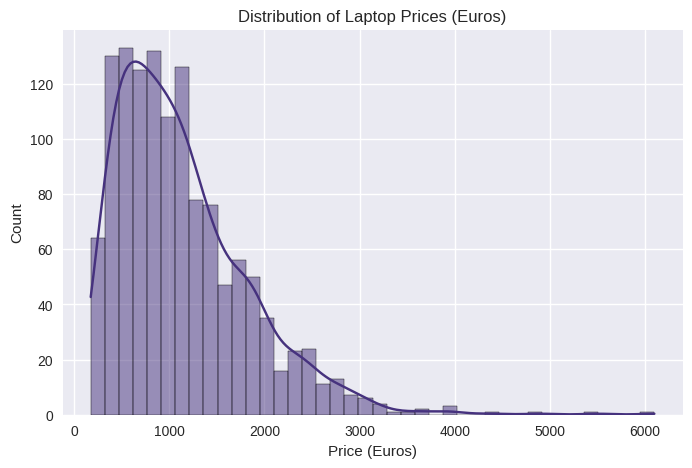

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_euros'], bins=40, kde=True)
plt.title("Distribution of Laptop Prices (Euros)")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()

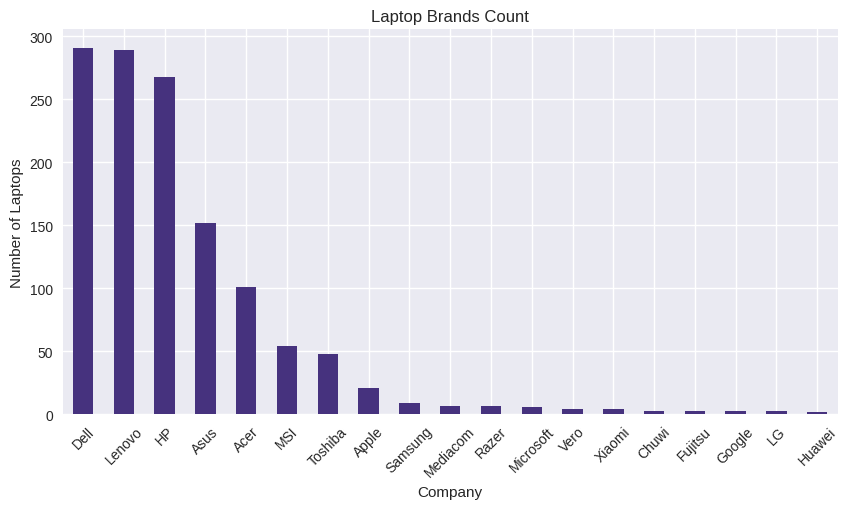

In [ ]:
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar')
plt.title("Laptop Brands Count")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)
plt.show()

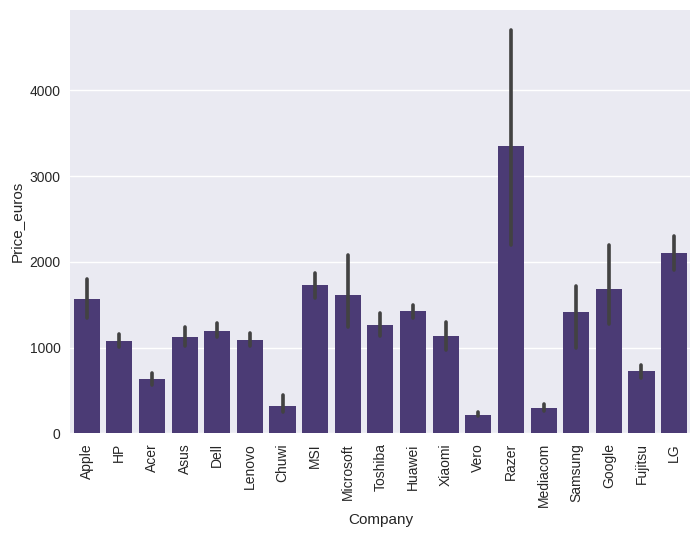

In [14]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

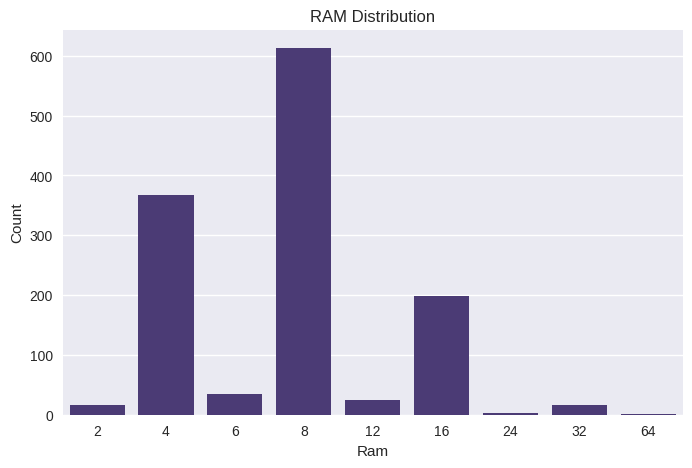

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Ram', data=df)
plt.title("RAM Distribution")
plt.ylabel("Count")
plt.show()

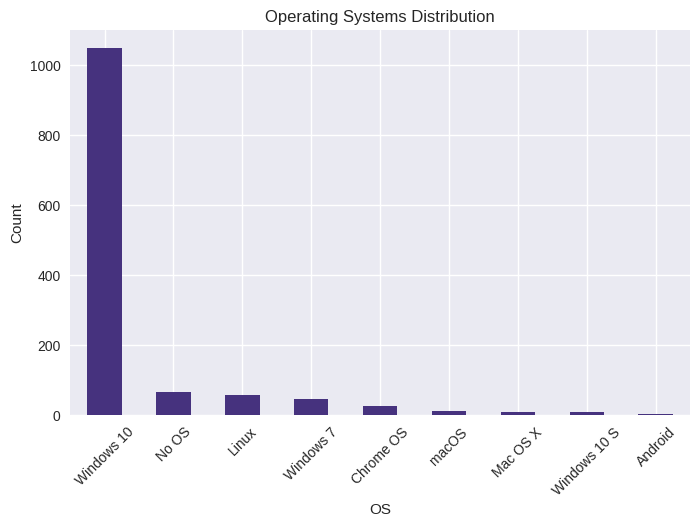

In [ ]:
plt.figure(figsize=(8,5))
df['OS'].value_counts().plot(kind='bar')
plt.title("Operating Systems Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

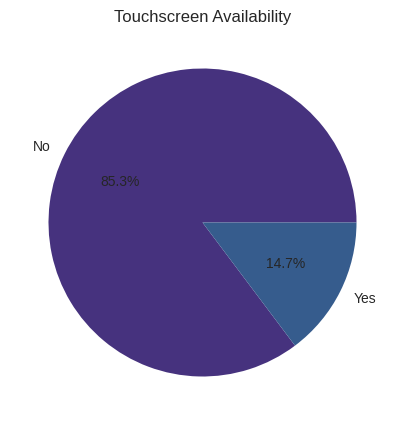

In [ ]:
plt.figure(figsize=(5,5))
df['Touchscreen'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("Touchscreen Availability")
plt.ylabel("")
plt.show()

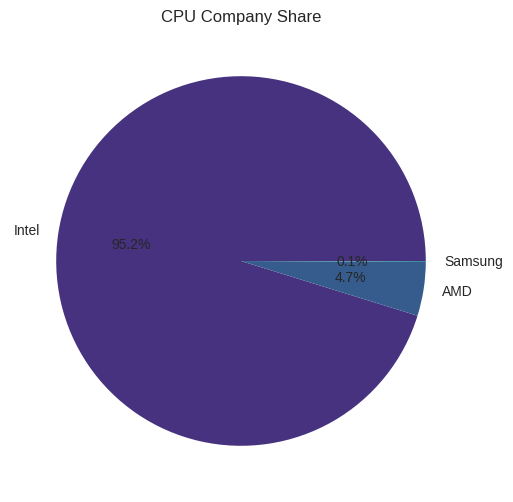

In [ ]:
plt.figure(figsize=(6,6))
df['CPU_company'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("CPU Company Share")
plt.ylabel("")
plt.show()

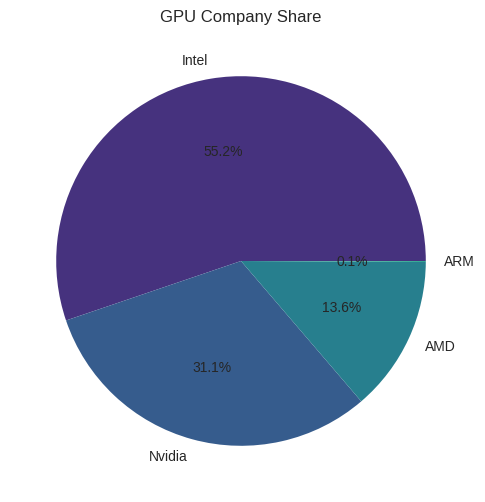

In [ ]:
plt.figure(figsize=(6,6))
df['GPU_company'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("GPU Company Share")
plt.ylabel("")
plt.show()

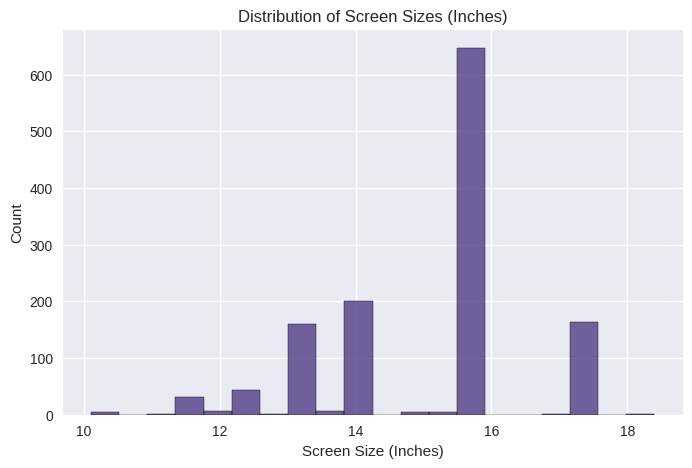

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Inches'], bins=20, kde=False)
plt.title("Distribution of Screen Sizes (Inches)")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Count")
plt.show()

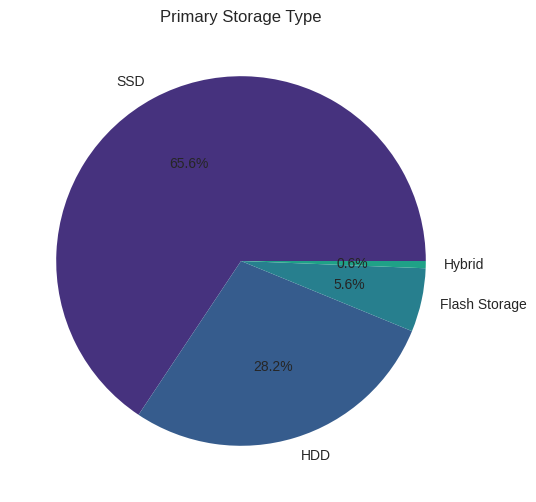

In [ ]:
plt.figure(figsize=(6,6))
df['PrimaryStorageType'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title("Primary Storage Type")
plt.ylabel("")
plt.show()

**Encode categorical columns into numerical**

In [13]:
from sklearn.preprocessing import LabelEncoder

df_hash = df.copy()
categorical_cols = df_hash.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    df_hash[col] = le.fit_transform(df_hash[col])

corr_matrix = df_hash.corr()

**Heatmap**

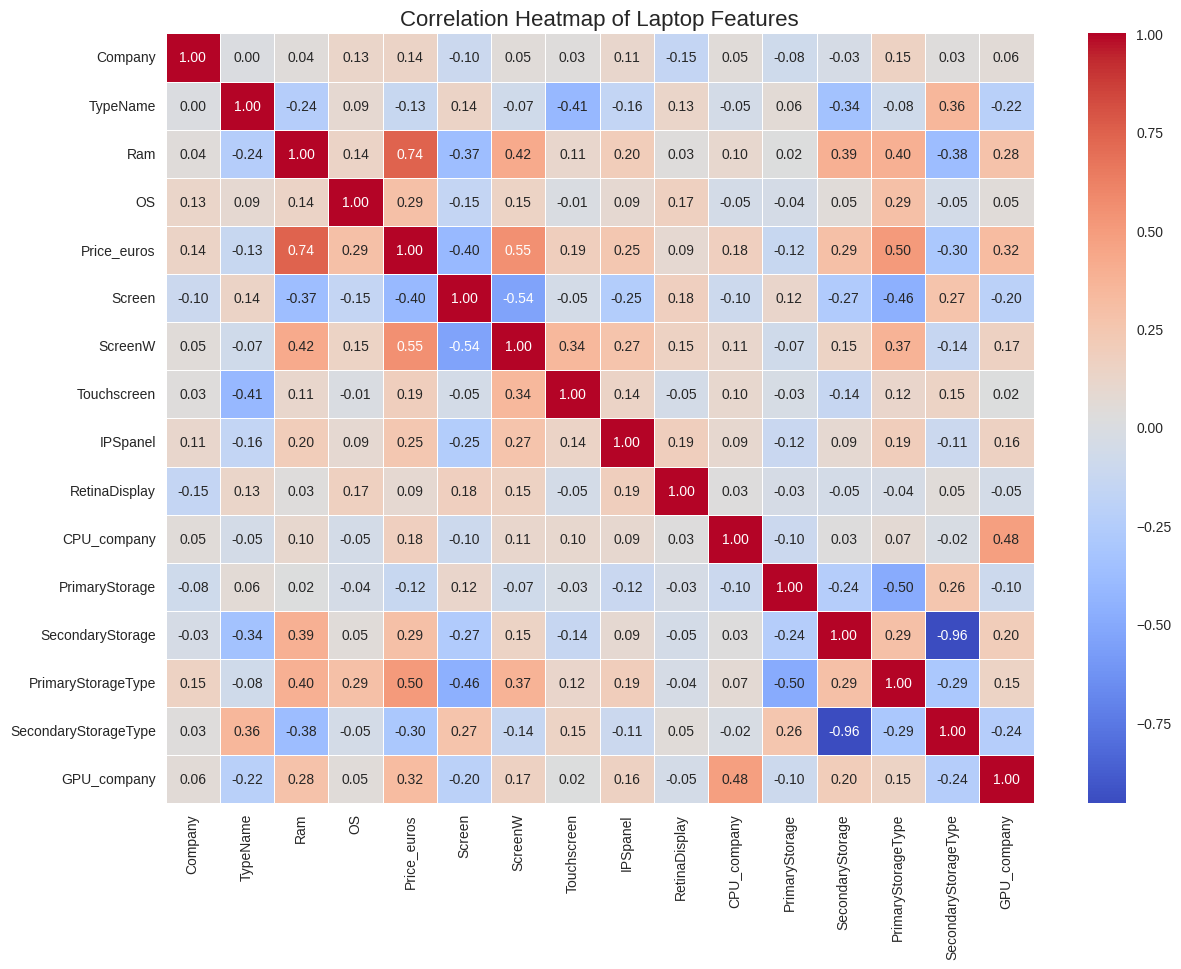

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Laptop Features", fontsize=16)
plt.show()

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error

***MODELS***

**Linear Regression**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Split features and target
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: handle categorical & numerical separately
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False),
     make_column_selector(dtype_include=object)),
    ('num', StandardScaler(),
     make_column_selector(dtype_exclude=object))
])

# Pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)


print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7450612400208845
MAE 263.5393194432204


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Optional: log-transform target if it's skewed
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Define the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your existing preprocessor
    ('model', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'model__n_estimators': [200, 500, 800],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5],
    'model__max_features': ['auto', 'sqrt', 0.8]
}

# Grid search for best parameters
grid_search = GridSearchCV(
    pipe, param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train_transformed)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict
y_pred_transformed = best_model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)  # inverse log transform

# Metrics
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

**Exporting the model**

In [28]:
import pickle

# save inside your Google Drive folder
pickle.dump(df, open('/content/drive/MyDrive/Colab Notebooks/Laptop_Price/df.pkl', 'wb'))
pickle.dump(pipe, open('/content/drive/MyDrive/Colab Notebooks/Laptop_Price/pipe.pkl', 'wb'))



In [26]:
df

,Company,TypeName,Ram,OS,Price_euros,Screen,ScreenW,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,Apple,Ultrabook,8,macOS,1339.69,Standard,2560,No,Yes,Yes,Intel,128,0,SSD,No,Intel
1,Apple,Ultrabook,8,macOS,898.94,Standard,1440,No,No,No,Intel,128,0,Flash Storage,No,Intel
2,HP,Notebook,8,No OS,575.00,Full HD,1920,No,No,No,Intel,256,0,SSD,No,Intel
3,Apple,Ultrabook,16,macOS,2537.45,Standard,2880,No,Yes,Yes,Intel,512,0,SSD,No,AMD
4,Apple,Ultrabook,8,macOS,1803.60,Standard,2560,No,Yes,Yes,Intel,256,0,SSD,No,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Windows 10,638.00,Full HD,1920,Yes,Yes,No,Intel,128,0,SSD,No,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows 10,1499.00,Quad HD+,3200,Yes,Yes,No,Intel,512,0,SSD,No,Intel
1272,Lenovo,Notebook,2,Windows 10,229.00,Standard,1366,No,No,No,Intel,64,0,Flash Storage,No,Intel
1273,HP,Notebook,6,Windows 10,764.00,Standard,1366,No,No,No,Intel,1024,0,HDD,No,AMD
